In [2]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

In [3]:
def f(x):                              # unconstrained function
    x2 = x[0]
    x3 = x[1]
    return (2-2*x2-3*x3)**2+x2**2+(x3-1)**2

def g(x):                                       # gradient
    return np.array([10*x[0]+12*x[1]-8, 20*x[1]+12*x[0]-14])

x0 = np.array([1,2])
t = .5

In [4]:
def inexact_linesearch(x,alpha):                     # inexact line search function to get alpha step for grad descent
    phi = f(x) - t*g(x).T @ g(x)*alpha
    if (f(x-alpha*g(x)) > phi):
        alpha = alpha*.5
        return inexact_linesearch(x,alpha)
    else:
        return alpha

In [5]:
t = .5
xk_list_grad = [x0]                              # initialie stored x
k = 0

while (np.linalg.norm(g(xk_list_grad[k])) > .000001):           # Gradient descent steps
    old = xk_list_grad[k]
    alpha = 1
    alpha = inexact_linesearch(old, alpha)
    new = old - alpha*g(old)
    xk_list_grad.append(new)
    k = k+1
    


In [6]:
xx = xk_list_grad[len(xk_list_grad)-1]                    # get final values

x2g = xx[0]                                                          
x3g = xx[1]
x1g = 1 - 2*x2g - 3*x3g

print("Guess for x2 and x3:" + str(x0))
print("Iterations: " + str(len(xk_list_grad)-1))  
print("x1 = " + str(x1g))                                               
print("x2 = " + str(x2g))
print("x3 = " + str(x3g))

Guess for x2 and x3:[1 2]
Iterations: 53
x1 = -1.0714285338571123
x2 = -0.14285687959669774
x3 = 0.7857140976835026


In [7]:
def Hess(x):
    H = np.zeros((2,2))
    H[0,0] = 10
    H[0,1] = 12
    H[1,0] = 12
    H[1,1] = 20
    return H

In [8]:
xk_list_newt = [x0]
k = 0
alpha = 1
while (np.linalg.norm(g(xk_list_newt[k])) > 0.000001):       
    old = xk_list_grad[k]                                                          
    new = old - alpha*np.linalg.solve(Hess(old),g(old))         # old - H                                               
    xk_list_newt.append(new)                                      
    k += 1                  

In [9]:
xx = xk_list_newt[len(xk_list_newt)-1]                    # get final values

x2n = xx[0]                                                          
x3n = xx[1]
x1n = 1 - 2*x2g - 3*x3g

print("Guess for x2 and x3:" + str(x0))
print("Iterations: " + str(len(xk_list_newt)-1))  
print("x1 = " + str(x1n))                                               
print("x2 = " + str(x2n))
print("x3 = " + str(x3n))

Guess for x2 and x3:[1 2]
Iterations: 1
x1 = -1.0714285338571123
x2 = -0.14285714285714302
x3 = 0.7857142857142858


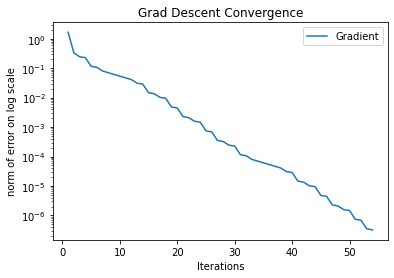

In [13]:
x = np.array([-1/7, 11/14])                 # exact solution x value
norm_of_err = []                              # list to be plotted

for f in xk_list_grad:                     # log (f-f*) 
    err = np.linalg.norm(f - x)
    norm_of_err.append(n_of_e)
    
t = np.arange(1,len(xk_list_grad)+1)       # iterations to plot

plt.plot(t,norm_of_err,label='Gradient')      # plot gradient 

plt.yscale('log')                               # make log-linear
plt.title('Grad Descent Convergence')
plt.xlabel('Iterations')
plt.ylabel('norm of error in log scale')
plt.show()                                     